In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 10% KDD99

In [27]:
filename = "C:/Users/Bin/Documents/Datasets/KDD99/kddcup.data_10_percent_corrected"

In [34]:
labels = []
for chunk in pd.read_csv(filename, chunksize=10000):
    labels += list(chunk.iloc[:,-1])

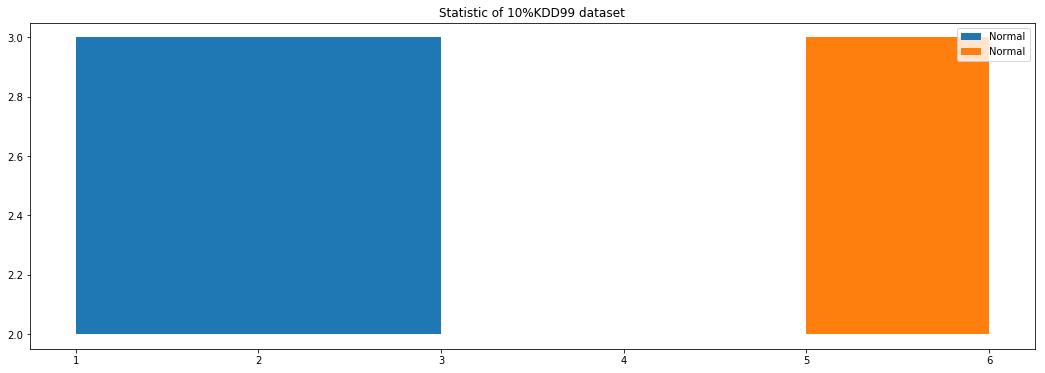

In [39]:
fig, ax = plt.subplots(1,1) 
fig.set_size_inches(18,6)
#plt.xlim(0,n_d.size)
#x_ticks_labels = ["0","100,000","200,000","300,000","400,000","500,000"]
#ax.set_xticklabels(x_ticks_labels, fontsize=10)
#ax.set_ylim(1,4)
ax.fill_between(x=[1,2,3],y1=np.ones(3)*2,y2=np.ones(3)*3,label="Normal")
ax.fill_between(x=[5,6],y1=np.ones(2)*2,y2=np.ones(2)*3,label="Normal")
#ax.fill_between(x=range(n_d_c.size),y1=np.ones(n_d_c.size)*2,y2=np.ones(n_d_c.size)*3,where=n_d_c,label="Anomaly")
plt.title("Statistic of 10%KDD99 dataset")
ax.legend()

In [46]:
foo = pd.Series([1,2,3,3,3,4,5,5,6])
foo[foo==3].index

Int64Index([2, 3, 4], dtype='int64')

In [55]:
col = pd.Series(labels)
unique = col.unique()
#fig, ax = plt.subplots(1,1,figsize=(13,6))

for l in unique:
  #  print(buffer)
    indices = col[col==l].index
    buffer = []
    tmp = indices[0]
    sub = []
    for i in indices[1:]:
        if i-tmp == 1:
            tmp = i
            sub.append(i)
        else:
            tmp = i
            if len(sub)>1:
                buffer.append(sub)
            else:
                sub.clear()
                
            
            
    

In [56]:
indices

Int64Index([141508, 141509, 141510, 141511, 141512, 142476, 148153, 397010,
            452000, 452001],
           dtype='int64')

In [57]:
buffer

[[141509, 141510, 141511, 141512, 452001],
 [141509, 141510, 141511, 141512, 452001],
 [141509, 141510, 141511, 141512, 452001],
 [141509, 141510, 141511, 141512, 452001]]

In [16]:
normal = 0
anomaly = 0
n_ = []
a_ = []
for chunk in pd.read_csv(filename, chunksize=10000):
    n_.append(normal)
    a_.append(anomaly)
    for index,row in chunk.iterrows():
        if row[-1] == "normal.":
            normal +=1
        else: 
            anomaly += 1

In [14]:

a_ = []
for chunk in pd.read_csv(filename, chunksize=10000,skiprows=80000):

    for index,row in chunk.iterrows():
        if row[-1] != "normal.":
           a_.append(row[-1])

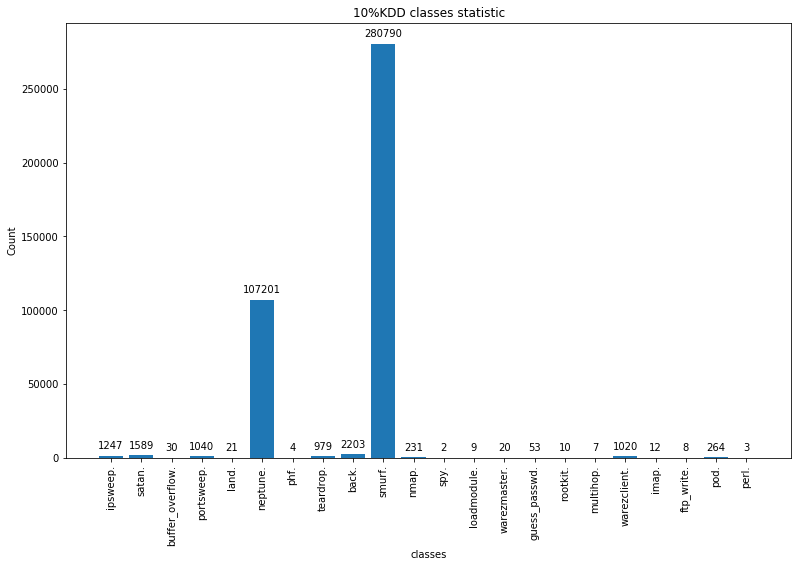

In [13]:
label = set(a_)
v = []
for elem in set(a_):
    v.append(a_.count(elem))
foo = pd.DataFrame(v,index=label,columns=["Count"])
fig,ax = plt.subplots(1,1,figsize=(13,8))
ax.bar(range(foo.index.size),foo.iloc[:,0])
ax.set_xticklabels(foo.index,rotation='vertical')
ax.set_xticks(range(foo.index.size))
ax.set_title("10%KDD classes statistic")
ax.set_xlabel("classes")
ax.set_ylabel("Count")

rects = ax.patches
for rect in rects:
    y_value = int(rect.get_height())
    x_value = rect.get_x() + rect.get_width() / 2

    ax.annotate(y_value, (x_value, y_value), xytext=(0, 5), textcoords="offset points", 
        ha='center', va='bottom')
plt.show()

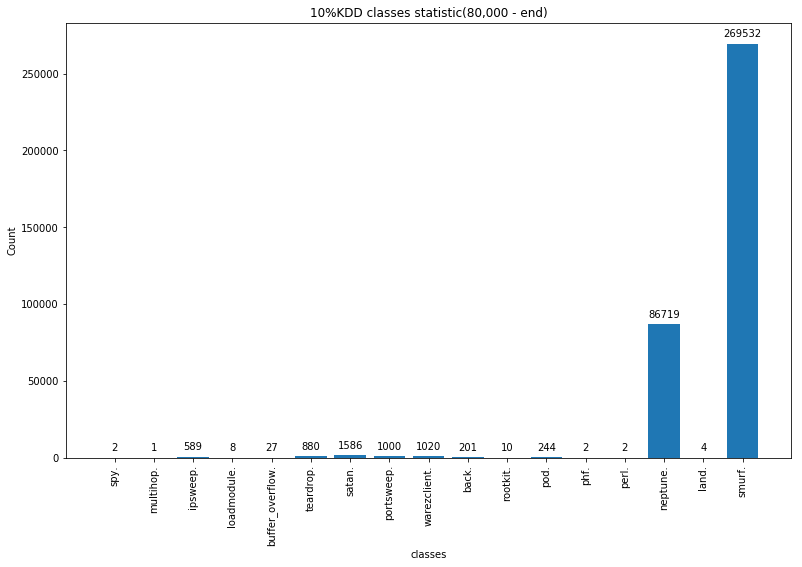

In [15]:
label = set(a_)
v = []
for elem in set(a_):
    v.append(a_.count(elem))
foo = pd.DataFrame(v,index=label,columns=["Count"])
fig,ax = plt.subplots(1,1,figsize=(13,8))
ax.bar(range(foo.index.size),foo.iloc[:,0])
ax.set_xticklabels(foo.index,rotation='vertical')
ax.set_xticks(range(foo.index.size))
ax.set_title("10%KDD classes statistic(80,000 - end)")
ax.set_xlabel("classes")
ax.set_ylabel("Count")

rects = ax.patches
for rect in rects:
    y_value = int(rect.get_height())
    x_value = rect.get_x() + rect.get_width() / 2

    ax.annotate(y_value, (x_value, y_value), xytext=(0, 5), textcoords="offset points", 
        ha='center', va='bottom')
plt.show()

In [12]:
foo

,Count
land.,21
warezclient.,1020
pod.,264
loadmodule.,9
spy.,2
guess_passwd.,53
nmap.,231
ftp_write.,8
phf.,4
multihop.,7


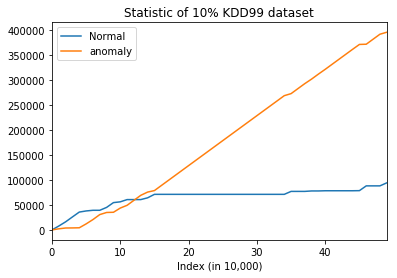

In [31]:
import matplotlib.pyplot as plt
pd.Series(n).plot(label="Normal")
pd.Series(a).plot(label="anomaly")
plt.title("Statistic of 10% KDD99 dataset")
plt.xlabel("Index (in 10,000)")
plt.legend()
plt.show()

In [9]:
n_d = np.array([n_[i]-n_[i-1] for i in range(1,len(n_))])


In [6]:
for i in range(n_d.size):
    if n_d[i] != 0:
        n_d[i] = 1

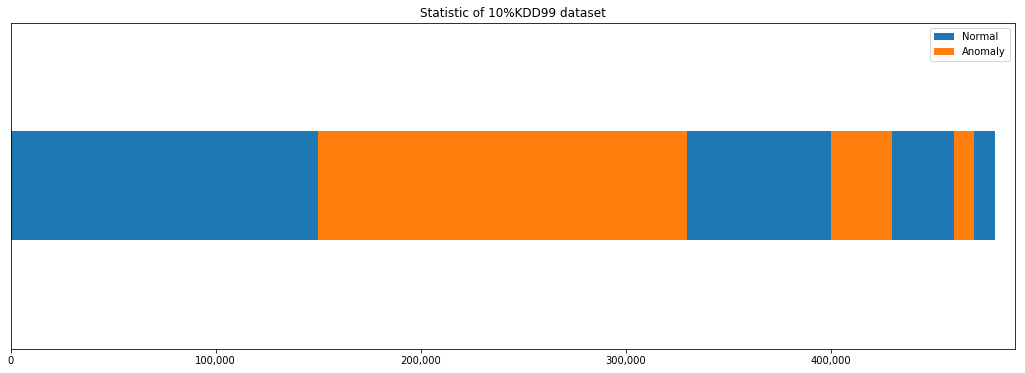

In [7]:
fig, ax = plt.subplots(1,1) 
fig.set_size_inches(18,6)
plt.xlim(0,n_d.size)
x_ticks_labels = ["0","100,000","200,000","300,000","400,000","500,000"]
ax.set_xticklabels(x_ticks_labels, fontsize=10)
ax.set_ylim(1,4)
ax.fill_between(x=range(n_d.size),y1=np.ones(n_d.size)*2,y2=np.ones(n_d.size)*3,label="Normal")
n_d_c = np.where(n_d==0,1,-1)
n_d_c = np.where(n_d_c==-1,0,1)
ax.get_yaxis().set_visible(False)
ax.fill_between(x=range(n_d_c.size),y1=np.ones(n_d_c.size)*2,y2=np.ones(n_d_c.size)*3,
              where=n_d_c,label="Anomaly")
plt.title("Statistic of 10%KDD99 dataset")
ax.legend()

# KDD99

In [1]:
filename = "C:/Users/Bin/Documents/Datasets/KDD99/http.csv"

In [3]:
normal = 0
anomaly = 0
n_ = []
a_ = []

for chunk in pd.read_csv(filename, chunksize=10000):

    n_.append(normal)
    a_.append(anomaly)
    #print(normal,anomaly)
    for index,row in chunk.iterrows():
        if row[-1] == "normal.":
            normal +=1
        else: 
            anomaly += 1

In [11]:
normal1 = 0
anomaly1 = 0
n_1 = []
a_1 = []
filename1 = "C:/Users/Bin/Documents/Datasets/KDD99/smtp.csv"
for chunk in pd.read_csv(filename1, chunksize=10000):

    n_1.append(normal1)
    a_1.append(anomaly1)
    #print(normal,anomaly)
    for index,row in chunk.iterrows():
        if row[-1] == "normal.":
            normal1 +=1
        else: 
            anomaly1 += 1

In [10]:
print(normal,anomaly)

619046 4045


In [12]:
print(normal1,anomaly1)

95371 1183


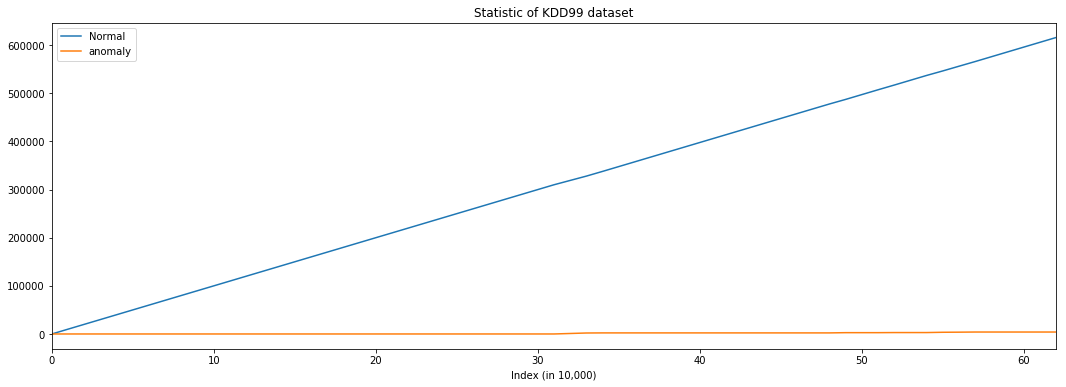

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
pd.Series(n_).plot(label="Normal")
pd.Series(a_).plot(label="anomaly")
plt.title("Statistic of KDD99 dataset")
plt.xlabel("Index (in 10,000)")
plt.legend()
plt.show()

In [5]:
n_d = np.array([n_[i]-n_[i-1] for i in range(1,len(n_))])


In [6]:
for i in range(n_d.size):
    if n_d[i] != 0:
        n_d[i] = 1

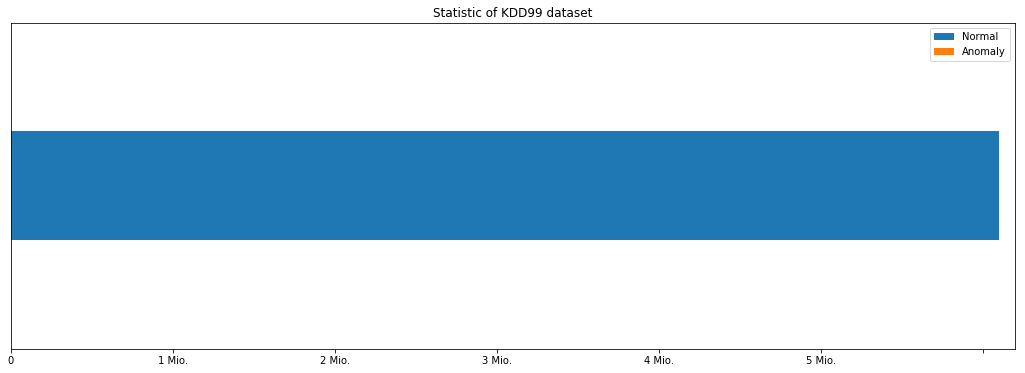

In [7]:
fig, ax = plt.subplots(1,1) 
fig.set_size_inches(18,6)
plt.xlim(0,n_d.size)
x_ticks_labels = ["0","1 Mio.","2 Mio.","3 Mio.","4 Mio.","5 Mio."]
ax.set_xticklabels(x_ticks_labels, fontsize=10)
ax.set_ylim(1,4)
ax.fill_between(x=range(n_d.size),y1=np.ones(n_d.size)*2,y2=np.ones(n_d.size)*3,label="Normal")
n_d_c = np.where(n_d==0,1,-1)
n_d_c = np.where(n_d_c==-1,0,1)
ax.get_yaxis().set_visible(False)
ax.fill_between(x=range(n_d_c.size),y1=np.ones(n_d_c.size)*2,y2=np.ones(n_d_c.size)*3,
              where=n_d_c,label="Anomaly")
plt.title("Statistic of KDD99 dataset")
ax.legend()